In [1]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import kurtosis 

In [2]:
text = "As a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced analytics. In that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter is oriented to business uses, while data analytics has a broader focus. The expansive view of the term isn't universal, though: In some cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate category. Data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of boosting business performance. Depending on the particular application, the data that's analyzed can consist of either historical records or new information that has been processed for real-time analytics uses. In addition, it can come from a mix of internal systems and external data sources. At a high level, data analytics methodologies include exploratory data analysis (EDA), which aims to find patterns and relationships in data, and confirmatory data analysis (CDA), which applies statistical techniques to determine whether hypotheses about a data set are true or false. EDA is often compared to detective work, while CDA is akin to the work of a judge or jury during a court trial -- a distinction first drawn by statistician John W. Tukey in his 1977 book Exploratory Data Analysis. Data analytics can also be separated into quantitative data analysis and qualitative data analysis. The former involves analysis of numerical data with quantifiable variables that can be compared or measured statistically. The qualitative approach is more interpretive -- it focuses on understanding the content of non-numerical data like text, images, audio and video, including common phrases, themes and points of view."

In [3]:
print(text)

As a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced analytics. In that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter is oriented to business uses, while data analytics has a broader focus. The expansive view of the term isn't universal, though: In some cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate category. Data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of boosting business performance. Depending on the particular application, the data that's analyzed can consist of 

## a. What is the probability of the word "data" occuring in each line?
I will first convert the text to lowerstring so that I can retrieve all instances of the word 'data'

In [4]:
text = text.lower()
# print(text)

I take it that line in this case refers to a complete sentence, so I split the text by a full stop, question mark, or exclamation mark followed by a space to get each sentence. 

In [5]:
sentences = re.split(r'[?.!]\s', text)


In [6]:
#view split sentences
index = 1
for x in sentences:
    print(index, " : ", x, "\n")
    index += 1

1  :  as a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (bi), reporting and online analytical processing (olap) to various forms of advanced analytics 

2  :  in that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter is oriented to business uses, while data analytics has a broader focus 

3  :  the expansive view of the term isn't universal, though: in some cases, people use data analytics specifically to mean advanced analytics, treating bi as a separate category 

4  :  data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of boosting business performance 

5  :  depending on the particular application, the da

We've split the text by sentence ending delimiters like full stops and question marks, but this also created unintended splits like the text "John W. Tukey" being split into two. Regardless, we can continue to count the number of times the word data appeared in each sentence

In [7]:
#count number of times data appears in list of sentences
print("The word 'data' appeared in ", ['data' in x for x in sentences].count(True), " sentences.")
print("Probability of 'data' appearing in a sentence is ", (['data' in x for x in sentences].count(True)/len(sentences)), " percent")

The word 'data' appeared in  11  sentences.
Probability of 'data' appearing in a sentence is  0.9166666666666666  percent


## b. What is the distribution of distinct word counts across all the lines?
I'll count the number of distinct words in each line and plot the distribution. I use regex to only obtain alphabetical or numerical substrings to eliminate substrings in the sentences that aren't words

In [8]:
#view distinct words/numbers in sentence
word_count = []
for x in sentences:
    uniqueWords = set(re.findall(r'[a-z0-9]+', x))
    print("Sentence: ", x, "\nDistinct words: ", uniqueWords, "\n")
    word_count.append(len(uniqueWords))

Sentence:  as a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (bi), reporting and online analytical processing (olap) to various forms of advanced analytics 
Distinct words:  {'business', 'online', 'applications', 'various', 'analytical', 'forms', 'advanced', 'term', 'processing', 'as', 'a', 'predominantly', 'analytics', 'intelligence', 'data', 'from', 'basic', 'of', 'to', 'assortment', 'olap', 'and', 'bi', 'refers', 'an', 'reporting'} 

Sentence:  in that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter is oriented to business uses, while data analytics has a broader focus 
Distinct words:  {'business', 'broader', 'for', 'term', 'approaches', 'that', 'while', 'a', 'analytics', 'the', 'oriented', 'focus', 'analyzing', 'with', 'umbrella', 'is', 'difference', 'another', 'data', 'it', 'latter', 'sense', 'in', 'has', 'to', 's', 'na

In [9]:
print(word_count)

[26, 29, 26, 40, 26, 15, 33, 26, 8, 11, 17, 27]


Shapiro test:  ShapiroResult(statistic=0.9381552338600159, pvalue=0.4745500385761261)
Kurtosis test:  -0.6482592729696455


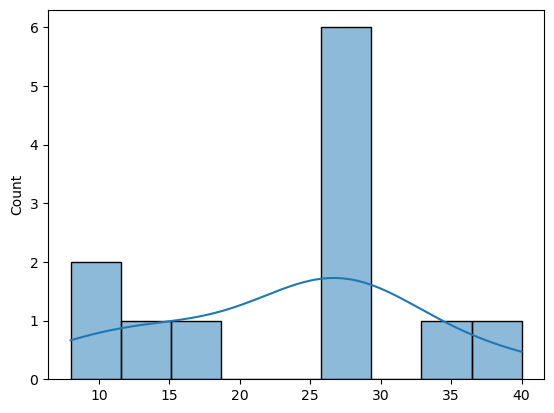

In [10]:
#plot word count distribution
sns.histplot(word_count, kde=True, bins = len(set(word_count)))
print('Shapiro test: ',shapiro(word_count))
print('Kurtosis test: ', kurtosis(word_count))

The distribution looked a bit flat from the histogram, but after checking kurtosis and running a shapiro test, we can also conclude the distinct word count in each sentence follows a normal distribution

## c. What is the probability of the word “analytics” occurring after the word “data”?
I'll find the probability by finding the amount of times 'data' occured, and the amount of times 'analytics' occured after it

In [11]:
dataCount = len(re.findall(r'data', text))
print("The word 'data' appeared ", dataCount, " times")
data_analyticsCount = len(re.findall(r'data analytics', text))
print("The words 'data analytics' appeared ", data_analyticsCount, " times")
print("The probability of 'analytics' occuring after 'data' is ", data_analyticsCount/dataCount, " percent")

The word 'data' appeared  18  times
The words 'data analytics' appeared  6  times
The probability of 'analytics' occuring after 'data' is  0.3333333333333333  percent
